# Some GW strain calculations, to compare with LISA Proposal Fig. 1
by Bill Gabella with help<br>
From the arxiv paper, "LISA Proposal" https://arxiv.org/abs/1702.00786

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 192  # Try 150 or 300?  My HiDpi is 192(?).  Just made PNGS bigger!

# To see the figures in PDF download of notebook, use imshow and not <img src= >.
from IPython.display import display, Math

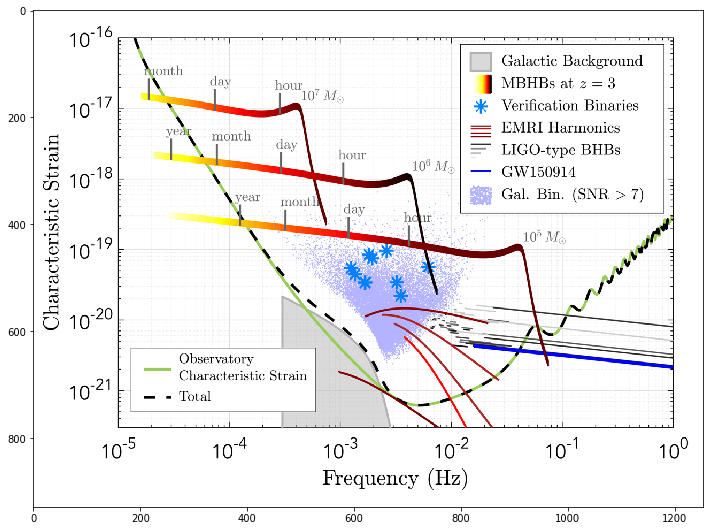

In [2]:
#<img src = "LISAPropFig1CharStrain2017.png">

plt.figure( figsize=(12,10) )
img = plt.imread("LISAPropFig1CharStrain2017.png")
plt.imshow(img )

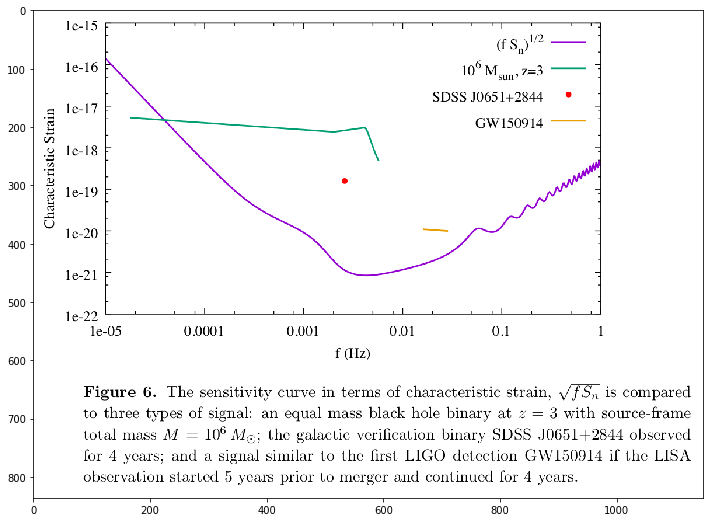

In [3]:
#<img src = "/home/gabella/Documents/astro/gravWaves/CornishRobsonFig6charStrain.png">

plt.figure( figsize=(12,10) )
img = plt.imread("CornishRobsonFig6charStrain.png" )
plt.imshow(img )

In [4]:
# Some constants...
Msun = 1.9891e30 # kg
Rsch = 2955.43 # m Schwarzschild for Msol, 2*G*Msol/c^2
Rdist = 1477.71# m Length for Msol, G*Msol/c^2
bigG = 6.67384e-11 # m^3/kg/s^2 Gravitational constant in SI
cee = 299792458. # m/s speed of light
au_m = 1.496e11 # m, astronomical unit
pc_m = 3.086e16 # m, parsec
ly_m = pc_m/3.262 # m, light-year
year_s = 365.*24*3600. # s, in a year of 365 days, NOT 365.25.

# Some functions...asuume SI inputs, especially kg for masses and NOT Msol.
def omegaOrb (m1,m2,a):
    """The orbital angular frequency for binary system, masses m1, m2, and separation a.
    All in SI units.
    Returns in rads/sec."""
    
    ww = bigG*(m1+m2)/a**3
    return( ww**(1/2.) )

def fOrb(m1, m2, a):
    """The orbital frequency for binary systems in Hz.  Masses and separation in SI units.
    Returns Hz.
    """
    return( omegaOrb(m1, m2, a)/(2*np.pi) )

def aFromF(m1, m2, f):
    """Given the orbital frequency in Hz, and the two masses in SI units, 
    returns the separation a in m."""
    aa = bigG*(m1 + m2)/(2*np.pi*f)**2
    return( aa**(1/3.) )

def hdimless(m1, m2, D, a):
    """The dimensionless strain h for two masses with separation a and luminosity 
    distance D from the observer.  All units in length, or the same units.
    """
    return( m1*m2/Msun**2*Rsch**2/D/a )

def hdimless2(m1, m2, D, a):
    """The dimensionless strain h for two masses with separation a and luminosity 
    distance D from the observer.  All units in SI.  From the lec09_gw notes, with a 4 in front.
    """
    Mc = chirpM(m1, m2)
    fgw = 2.0*fOrb(m1, m2, a)
    aa = 4.0*bigG*Mc/cee**2/D * (bigG*Mc/cee**2 * np.pi*fgw/cee)**(2/3.)
    return( aa )


def chirpM(m1, m2):
    """The chirp mass (m1*m2)^(3/5)*(m1+m2)^(-1/5).
    """
    return( (m1*m2)**(3/5.)/(m1+m2)**(1/5.) )

def redM(m1, m2):
    """Reduced mass mu = m1*m2/(m1+m2)
    """
    return( m1*m2/(m1+m2) )

def totM(m1, m2):
    """Total mass m_tot = m1+m2
    """
    return( m1+m2 )

def fdot(m1, m2, f):
    """From lec09_gw the change of frequency in time, SI units.
    Use G*Mc/c^2 as the distance, Rdist*Mc.
    Return a tuple of ( fdot, fdot/f ), in SI. 
    """
    Mc = chirpM(m1, m2)
    aa = bigG*Mc/cee**2 
    bb = (96/5)*(f*cee)*aa**(5/3.)*(np.pi*f/cee)**(8/3.)
    cc = bb/f
    return( (bb, cc) )


In [5]:
# Test the routines defined above.
m1=0.5e5*Msun
m2=0.5e5*Msun
asep = 100*pc_m
RR = 24000.*1e6*pc_m
print( 'chirpM is {:g}'.format( chirpM(m1, m2) ) )
print( 'redM is {}'.format( redM(m1, m2) ) ) 
print( redM(m1,m2) )
print( 'fdot is {}'.format( fdot(m1, m2, 1e-3) ) )

aa = fOrb(m1, m2, 100.0*pc_m)
bb = aFromF(m1, m2, aa)
print(' 100 pc or {:.3e} m gives fOrb {:.3e} Hz and dist {:.3e} m'.format(100*pc_m, aa, bb) )

cc = hdimless(m1, m2, 24000e6*pc_m, 100.0*pc_m)
dd = hdimless2(m1, m2, 24000e6*pc_m, 100.0*pc_m)
print('hdimless {} and hdimless2 {}'.format(cc,dd) )

chirpM is 8.65806e+34
redM is 4.97275e+34
4.97275e+34
fdot is (3.123139596502399e-10, 3.123139596502399e-07)
 100 pc or 3.086e+18 m gives fOrb 1.070e-16 Hz and dist 3.086e+18 m
hdimless 9.553846920892681e-30 and hdimless2 9.54506563438262e-30


## Try to duplicate total intrinsic mass of $10^5$ solar mass BBH.
The redshift $z$ ONLY shifts the frequency $f_{GW}$ of the wave.

In [6]:
m1 = 0.5e5*Msun
m2 = 0.5e5*Msun
zee = 3.0

# Find the a values with f_GW in LISA band, really just before and maybe during.
print('Find a good starting separation for entering the LISA band, 1e-5 Hz -ish.')
print('If z=3 you have 1/(1+3) the $f_{GW}$.')

for apc in np.logspace(0,-4,10):
    aforb = fOrb(m1, m2, apc*au_m)
    print( '{:e} AU, \tf_gw is {:e} Hz at \tz= {:3.1f} and \tfOrb = {:e} Hz.'.format(apc, 2*aforb/(1+zee), zee, aforb ) )

Find a good starting separation for entering the LISA band, 1e-5 Hz -ish.
If z=3 you have 1/(1+3) the $f_{GW}$.
1.000000e+00 AU, 	f_gw is 5.010822e-06 Hz at 	z= 3.0 and 	fOrb = 1.002164e-05 Hz.
3.593814e-01 AU, 	f_gw is 2.325817e-05 Hz at 	z= 3.0 and 	fOrb = 4.651635e-05 Hz.
1.291550e-01 AU, 	f_gw is 1.079549e-04 Hz at 	z= 3.0 and 	fOrb = 2.159098e-04 Hz.
4.641589e-02 AU, 	f_gw is 5.010822e-04 Hz at 	z= 3.0 and 	fOrb = 1.002164e-03 Hz.
1.668101e-02 AU, 	f_gw is 2.325817e-03 Hz at 	z= 3.0 and 	fOrb = 4.651635e-03 Hz.
5.994843e-03 AU, 	f_gw is 1.079549e-02 Hz at 	z= 3.0 and 	fOrb = 2.159098e-02 Hz.
2.154435e-03 AU, 	f_gw is 5.010822e-02 Hz at 	z= 3.0 and 	fOrb = 1.002164e-01 Hz.
7.742637e-04 AU, 	f_gw is 2.325817e-01 Hz at 	z= 3.0 and 	fOrb = 4.651635e-01 Hz.
2.782559e-04 AU, 	f_gw is 1.079549e+00 Hz at 	z= 3.0 and 	fOrb = 2.159098e+00 Hz.
1.000000e-04 AU, 	f_gw is 5.010822e+00 Hz at 	z= 3.0 and 	fOrb = 1.002164e+01 Hz.


## $h$ dimensionless and $h_c$ the characteristic strain

In [7]:
# From Ned Wright's Cosmological Calculator, defaults, open uni.

zee = 3.0
dL = 24817e6*pc_m # pc for z=3.0, Natasha recommends astropy.

# For the above, calculate a set of numpy arrays related to the  GW frequency.

aStart = au_m # Start at 1 AU...from table above.
aFinish = Rsch*(m1 + m2)/Msun  # And go until the two event horizons touch.
print('aStart is {:.3e} and aFinish is {:.3e} AU.'.format( aStart/au_m, aFinish/au_m) )
aseps = np.logspace( np.log10(aStart), np.log10(aFinish), 100 )

freqs = []
fdots = []
fdotoverfs = []  # The second element of the tuple that fdot() caluclates.
hhs = [] # dimensionless strain
hcs = [] # characteristic strain, follow Natasha and equals h*sqrt(f^2/f-dot) .

for aa in aseps:
    ff = 2*fOrb(m1, m2, aa)/(1+zee)
    freqs.append( ff )
    ffd = fdot(m1, m2, ff)
    fdots.append( ffd[0] )
    fdotoverfs.append( ffd[1] )
    
    aa = hdimless(m1, m2, dL, aa)
    hhs.append( aa )
    hcs.append( aa*np.sqrt(ff**2/ffd[0]) )  # Modified by the number of cycles you get to "add."
    
    
# Make everything a numpy array.
freqs = np.array( freqs )
fdots = np.array( fdots )
fdotoverfs = np.array( fdotoverfs )

hhs = np.array( hhs )
hcs = np.array( hcs )

print('length of freq {}, fdots {}, and fdotoverfs {}'.format(len(freqs), len(fdots), len(fdotoverfs) ) )
print('length of hhs {} and hcs {}'.format( len(hhs), len(hcs) ) )

print('h-dimless at a {:.2e} AU is {:.3e}, and h-characteristic is {:.3e}'.format(aseps[0]/au_m, hhs[0], hcs[0] ) )

aStart is 1.000e+00 and aFinish is 1.976e-03 AU.
length of freq 100, fdots 100, and fdotoverfs 100
length of hhs 100 and hcs 100
h-dimless at a 1.00e+00 AU is 1.906e-22, and h-characteristic is 8.903e-19


Text(0.5,1,'m1 5.00e+04 Msol and m2 5.00e+04 Msol, $D_L$ 2.48e+04 Mpc')

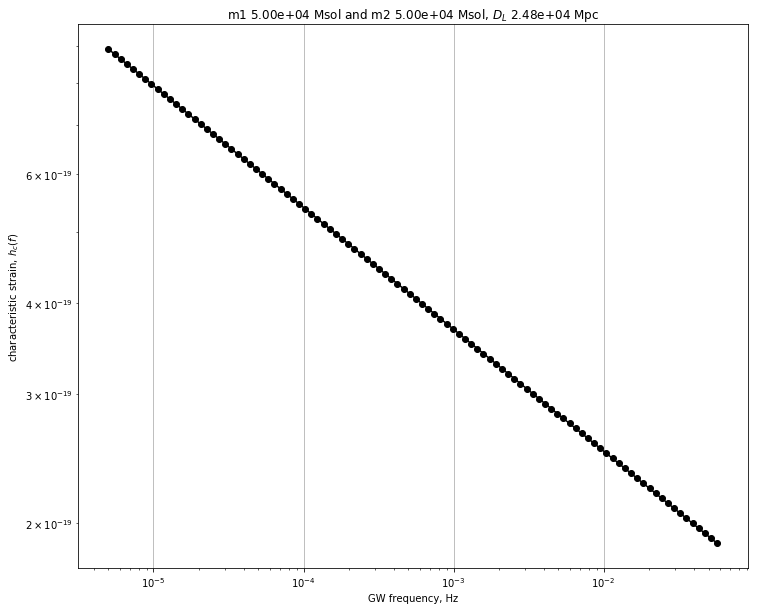

In [8]:
# Plot hchars

fig, ax = plt.subplots( figsize=(12,10) )
ax.loglog( freqs, hcs, 'ko-')
plt.grid(True)
ax.set_ylabel('characteristic strain, $h_c(f)$')
ax.set_xlabel('GW frequency, Hz')
ax.set_title('m1 {:.2e} Msol and m2 {:.2e} Msol, $D_L$ {:.2e} Mpc'.format( m1/Msun, m2/Msun, dL/pc_m/1e6 ) )

## Other references for $h_c(f)$
http://www.tapir.caltech.edu/~teviet/Waves/gwave_spectrum.html
gives 
$$h_c^2(f) \approx \int h^2(t) f dt \approx {1\over 8} N h_0^2$$
where $N$ is the number of cycles you have watched the signal.  That would be $N=f_{GW}*T_{Obs}$ for fixed $f_{GW}$.  And if the frequency slides to higher and higher numbers, you estimate the $T_{Obs}$ using bandwidths like Cornish and Robson.  See Eqn. 

## Plot on the LISA Fig. 1 graphic.

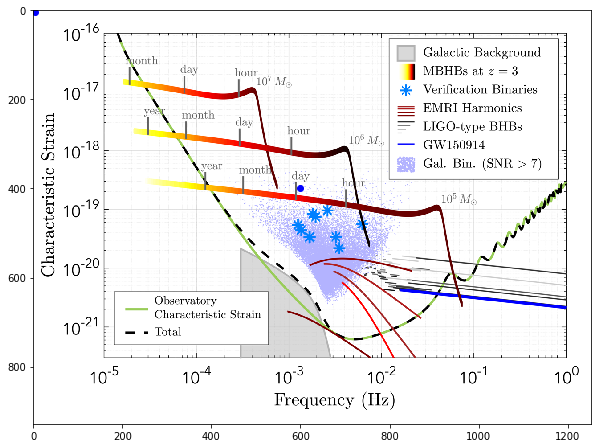

In [9]:
# https://stackoverflow.com/questions/34458251/plot-over-an-image-background-in-python
# Try to put plot points over the graphic.  Seems to demand we use x_pixels and y_pixels.
# Conversion function in cell below.

import matplotlib.pyplot as plt
imfname = "LISAPropFig1CharStrain2017.png"
img = plt.imread(imfname)
fig, ax = plt.subplots(figsize=(10,8) )

ax.plot( [4, 600], [4, 400], 'bo')

ax.imshow(img)

In [10]:
# From PlotDigitizer xml save of Calibration and Data, looks like...
# PlotDigitizer is at http://plotdigitizer.sourceforge.net/ 

# <data>
# <image file='LISAPropFig1CharStrain2017.png' />
# <axesnames x='freq'  y='char strain' />
# <calibpoints minXaxisX='159.0' minXaxisY='779.5' maxXaxisX='1198.0' maxXaxisY='780.0' 
#    minYaxisX='159.0' minYaxisY='779.5' maxYaxisX='160.0' maxYaxisY='51.5' 
#    aX1='-5.0' aX2='0.0' aY1='-20.522878745280337' aY2='-16.0' isXLog='true' isYLog='true' />
# </data>

# X axis is at pixels and values...
xaxisPxl = [ (159.0, 779.5), (1198.0, 780.0) ]
xaxisVals = [ (1e-5, 3e-22), (1e0, 3e-22) ]
# Y axis is at pixels and values...
yaxisPxl = [ (159.0, 779.5), (160.0, 51.5) ]
yaxisVals = [ (1e-5, 3e-22), (1e-5, 1e-16) ]
# and both are logarithmic.
# Linear interp in the logarithm, by hand for now.
def pxl2val(pxls):
    """Input a tuple of pixels for above xaxis, etc.
    """
    xp, yp = pxls
    xratio = (xp - xaxisPxl[0][0])/(xaxisPxl[1][0] - xaxisPxl[0][0])
    yratio = (yp - yaxisPxl[0][1])/(yaxisPxl[1][1] - yaxisPxl[0][1])
    dxvals = (np.log10(xaxisVals[1][0]) - np.log10(xaxisVals[0][0]) )
    dyvals = (np.log10(yaxisVals[1][1]) - np.log10(yaxisVals[0][1]) )
    
    logx = xratio*dxvals + np.log10( xaxisVals[0][0] )
    logy = yratio*dyvals + np.log10( yaxisVals[0][1] )
    
    return( (10**logx, 10**logy ) )

print( 'pxl2val( (159.0, 779.5) ) ', pxl2val( (159.0, 779.5) ) )
print( 'pxl2val( (1198, 51.5) ) ', pxl2val( (1198, 51.5) ) )
print( 'pxl2val( (390, 450) ) ', pxl2val( (390, 450) ) )

def val2pxl(vals):
    """Input a tuple of pixels for above xaxis, etc.
    """
    xv, yv = vals
    xv = np.log10(xv)
    yv = np.log10(yv)
    xratio = (xv - np.log10(xaxisVals[0][0]) )/\
        (np.log10(xaxisVals[1][0]) - np.log10(xaxisVals[0][0]) )
    yratio = (yv - np.log10(yaxisVals[0][1]) ) /\
        (np.log10(yaxisVals[1][1]) - np.log10(yaxisVals[0][1]) )
    dxpxl = xaxisPxl[1][0] - xaxisPxl[0][0]
    dypxl = yaxisPxl[1][1] - yaxisPxl[0][1]
    
    xpxl = xratio*dxpxl + xaxisPxl[0][0]
    ypxl = yratio*dypxl + yaxisPxl[0][1]
    
    return( (xpxl, ypxl ) )

print( 'val2pxl( (1e-5, 3e-22) ) ', val2pxl( (1e-5, 3e-22) ) )



pxl2val( (159.0, 779.5) )  (1e-05, 3.0000000000000013e-22)
pxl2val( (1198, 51.5) )  (1.0, 1e-16)
pxl2val( (390, 450) )  (0.00012931407967054433, 9.480490267254361e-20)
val2pxl( (1e-5, 3e-22) )  (159.0, 779.5)


## Put Characteristic strain calculated above on the graphic from the LISA Proposal Fig. 1

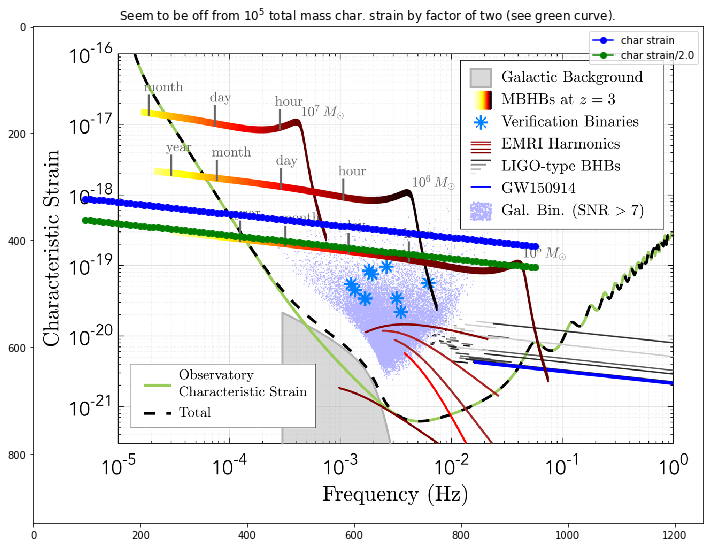

In [11]:
# 
import matplotlib.pyplot as plt
imfname = "LISAPropFig1CharStrain2017.png"
img = plt.imread(imfname)
fig, ax = plt.subplots(figsize=(12, 10) )

# Change freqs and hcs into x and y pixels, using the above functions.
xpxl = []
ypxl = []
xxpxl = []
yypxl = []
fac = 2.0
for xv, yv in zip(freqs, hcs):
    aa = val2pxl( (xv, yv) )
    xpxl.append(aa[0])
    ypxl.append(aa[1])
    bb = val2pxl( (xv, yv/fac))
    xxpxl.append(bb[0])
    yypxl.append(bb[1])

    
ax.plot(xpxl, ypxl, 'bo-', label='char strain')
ax.plot(xxpxl, yypxl, 'go-', label = 'char strain/{:.1f}'.format(fac) )

ax.legend()
ax.set_title('Seem to be off from $10^5$ total mass char. strain by factor of two (see green curve).')
ax.imshow(img)

## Luminosity distance $D_L$ versus redshift $z$ (this is in astropy!),
using http://www.astro.ucla.edu/~wright/CosmoCalc.html .

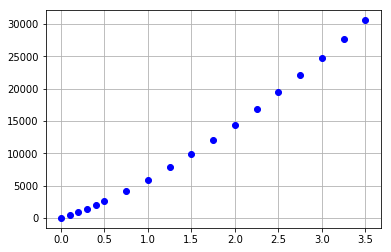

In [12]:
# a few discrete points, H0=69.6  Omega_M = 0.286 Omeag_Vac = 0.71 Open Uni
# http://www.astro.ucla.edu/~wright/CosmoCalc.html 
zned = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.50, 2.75, 3.0,
       3.25, 3.5]
dlned = [0.0, 449., 933., 1452., 2002., 2585., 4170., 5928., 7845., 9907., 12104., 14427.,
        16867., 19416., 22068., 24817., 27656., 30582.] # Mpc
plt.plot(zned, dlned, 'bo')
plt.grid(True)


## Miscellany

In [13]:
# C&R eqn 24
zee = 3
amass = chirpM(0.5e6, 0.5e6)*Msun/(1+zee)
aa = (5*bigG*amass/cee**3/year_s)**(3/8.)/( 8*np.pi*bigG*amass/cee**3)
print(' freq one year out from coalescence C&R eqn (24), says 2.93e-5 Hz, my freq is {:.3e} Hz.'.format( aa ) )

 freq one year out from coalescence C&R eqn (24), says 2.93e-5 Hz, my freq is 1.656e-04 Hz.


In [14]:
# Bill BG 5 pp 20 and 21...
zee = 3
amass = chirpM(0.5e6, 0.5e6)*Msun/(1+zee)
bigA = 96/5.*(bigG*amass/cee**2)**(5/3.)*cee*(np.pi/cee)**8/3
aa = ( 3/8./bigA/year_s )**(3/8.)
print(' freq one year out from coalescence C&R eqn (24), says 2.93e-5 Hz, my freq is {:.3e} Hz.'.format( aa ) )

 freq one year out from coalescence C&R eqn (24), says 2.93e-5 Hz, my freq is 2.277e+12 Hz.


In [15]:
# For fancy output...as well as display of graphics in a way the PDF will show them.
# https://stackoverflow.com/questions/48422762/is-it-possible-to-show-print-output-as-latex-in-jupyter-notebook
# Ellipsodal area, Knud Thomsen's formula
a = 13.49; b = 2.25; aexp = 1.6075
P = 4*np.pi*( (a*b)**aexp + (a*b)**aexp + (b*b)**aexp)**(1/aexp)/3**(1/aexp)
V = np.pi*a*b*b


display(Math(r'Dims: {}x{}m \\ Area: {}m^2 \\ Volume: {}m^3'.format(a, round(b,2), P, V)))

<IPython.core.display.Math object>

For a pure, single strain $h_0(t)$ the equivalent power spectral density is the ensemble average of the fourier transform with a time factor (see Cornish and Robson eqn. (19), 